In [27]:
# 为了显示中文
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

模拟一个端到端的项目案例，假如我们是一个房地产公司最近新雇佣的数据科学家，以下是我们会经历的主要步骤：
1. 观察大局
1. 获得数据
1. 从数据探索和可视化中获得洞见
1. 机器学习算法的数据准备
1. 选择和训练模型
1. 微调模型
1. 展示解决方案
1. 启动、监控和维护系统


# 使用真实数据

流行的开放数据存储库：
* [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
* [Kaggle datasets](https://www.kaggle.com/datasets)
* [Amazon's AWS datasets](https://registry.opendata.aws/)
<br>元门户站点(会列出开发的数据存储库):
* (http://dataportals.org/)
* (https://www.opendatamonitor.eu/)
* (https://www.quandl.com/)
<br>其他一些列出许多流行的开放数据存储库的页面：
* (https://www.datasetlist.com/)
* ………………

本章从StatLib数据库选择加州房价数据集，基于1990年加州人口普查的数据，出于教学的目的，添加了一个分类属性，并且移除了一些特征

## 观察大局

模型需要从这个数据中学习，从而能够根据所有其他指标，预测任意区域的房价中位数

## 框架选择问题

#### 询问两个问题：
1. 询问业务目标是什么，公司如何使用这个模型，如何从中获益。
<br> 这决定了我们会怎么设定问题，选择什么算法，使用什么测量方式来评估模型的性能，以及该花多少力气来进行调整
<br>回答：这个模型的输出(对一个区域房价中位数的预测)将会和其他许多信号一起被传输到另一个学习系统，下游系统会据此决策一个给定的区域是否值得投资。这会直接影响收益，因而正确获得这个信息至关重要。
1. 当前解决方案(如果有的话)，是什么。
<br>可以用来当做参考，也能获得解决问题的洞察。
<br>回答：目前由一个专家团队手动估算区域的住房价格，一个团队持续收集最新的区域信息(不包括房价中位数),然后使用复杂的规则来进行估算。既昂贵又耗时，而且还不准，显著误差率高达15%

#### 设计系统
有了上面的信息，我们开始设计我们的系统<br>
* 首先，我们需要回答框架问题：监督式，还是无监督式，又或者强化学习。是分类任务，还是回归任务，又或者是其他任务。应该采用批量学习还是在线学习技术？
* 显然，这是一个典型的监督学习任务，因为已经给出了标记的训练示例(每个示例都有预期的产出，也就是该地区的房价中位数)
* 并且，这也是一个典型的回归任务，因为需要对某个值进行预测。更具体而言，这是一个多变量回归问题，因为系统需要使用多个特征进行预测。
* 最后，我们没有一个连续的数据流不断的流进系统，所以不需要针对数据做出特别的调整，数据量也不是很大，不需要多个内存，故简单的批量学习就能胜任

## 选择性能指标

接下来要选择一个性能指标。回归问题的典型性能衡量指标是均方根误差(RMSE),他测量的是预测过程中，预测错误的标准偏差。公式如下:
$$RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})^2}$$
也可以采用平均误差，又称为曼哈顿距离
$$MAE(X,h)=\frac{1}{m}\sum_{i=1}^{m}|h(X^{(i)})-y^{(i)}|$$

包含n个元素的向量Vk的范数可以定义为：
$$||V||_k=(|v_0|^k+|v_1|^k+....+|v_n|^k)^{\frac{1}{k}}$$
k=0,则仅给出了向量的基数，也就是元素的数量，n=无穷，则给出了向量中的最大值
<br>其中k越大，越关注大的值，忽略小的值，这就是为什么RMSE比MAE对异常值更加敏感。但是当异常值非常稀少(比如钟形曲线)((正态分布的一种))时,RMSE的表现优异，通常作为首选。

## 检查假设

列举和验证到目前为止(由你或者其他人)做出的假设，是一个非常良好的习惯；这可以在初期检查出严重问题。
<br>例如：我们假设是价格会被下游系统使用，但如果下游系统需要将价格转换为类别(比如：廉价、中等或者昂贵)，转而使用类别而不是价格本身。这时候并不需要完全准确的预估价格，只需要给出正确的类别就够了。
<br>如果在这种情况下，这个问题就应该被设定为分类任务，而不是回归任务

# 获取数据

(狗头),打开作者的实例代码！

## 创建工作区

首先需要安装python，没有的可以百度
<br>接下来需要为代码创建工作区，又或者创建一个隔离环境(强烈推荐)
<br>安装需要的包
<br>运行jupyter

## 下载数据

(狗头)，从作者的github项目获取数据集！

一般环境下，数据可能在数据库里面，需要一些特别的操作，本项目很简单，下载做的data里面的housing.tgz集合，里面有houosing.csv文档.<br>
我们在linux下可以使用tar xzf 压缩包来解压提取文件，当然我们也可以使用python的简单函数来实现，当数据会定期发送变换，还可以写个小脚本。

In [28]:
# 获取数据
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     os.makedirs(housing_path, exist_ok=True)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
# fetch_housing_data()

# 加载数据
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

## 快速查看数据结构

In [29]:
# 查看数据结构
housing = load_housing_data()
housing.head() # 查看前五行的信息

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
housing.info() # 快速获取数据集的简单描述，特别是总行数，每个属性的类型和非空值数量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
housing["ocean_proximity"].value_counts() # 查看非数字字段有多少分类存在，每个分类数量

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [32]:
housing.describe() #显示属性摘要

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


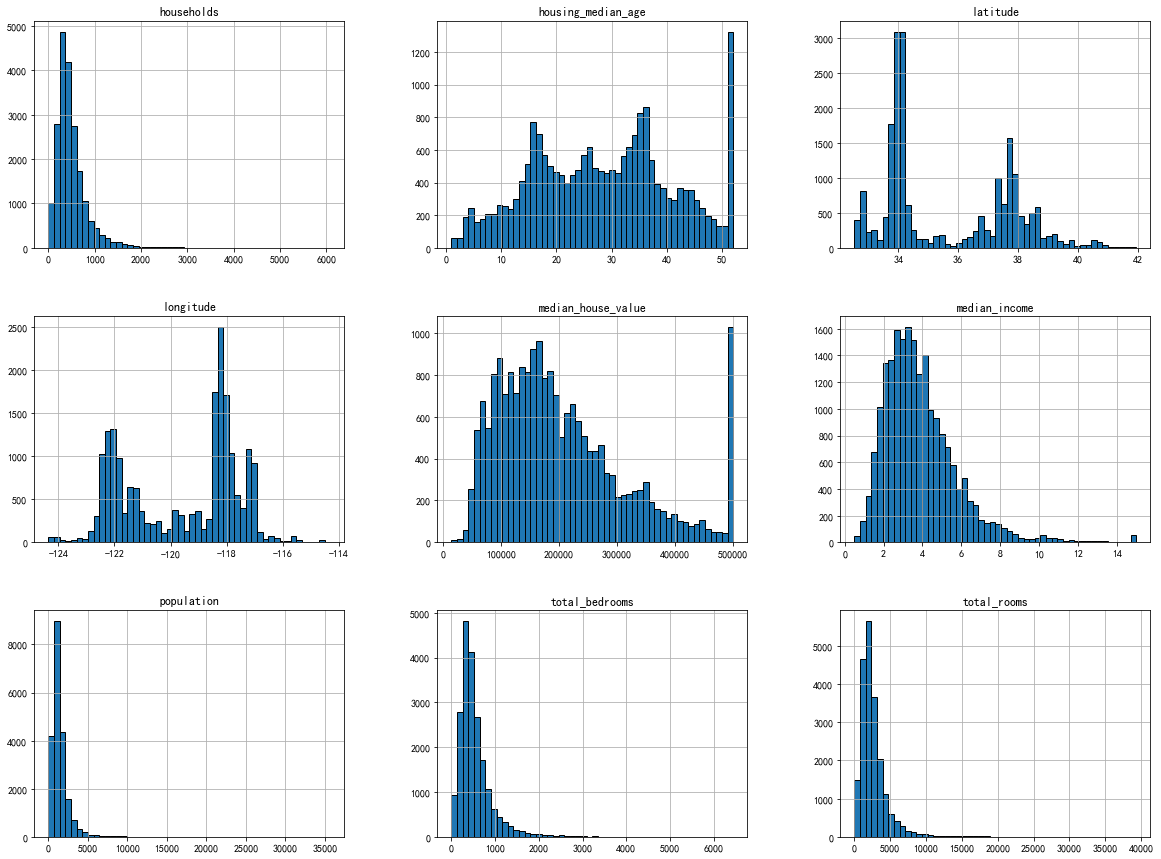

In [33]:
# 绘制每个数值属性的直方图
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15),edgecolor="black")
plt.show()

观察直方图，可以发现：
1. 首先收入中位数这个属性看起来不像是用美元(USD)在衡。通过与收集数据的团队核实，得知数据已经按比例缩小，并框处中位数的上限为15，下限为0.5.在机器学习中，使用经过预处理的属性是很常见的事情，倒不一定是个问题，但是至少要了解数据是如何计算的。
1. 房龄中位数和房价中位数也被设定了上限，而后者正是我们需要的目标属性(标签),这是个问题，因为这样机器学习算法很可能永远也学不到超过这个上限的价格。因此，需要继续和客户进行核实，查看是否存在问题。如果他们说，需要精确的预测值，甚至会超过50w美元。那么，我们通常有两个选择：
    a. 对被设置了上限的区域，重新收集标签值。
    a. 或是将这些区域的数据从训练集中移除(包括从测试中移除，因为如果预测值超过50w,系统不应该被评估为不良)
1. 这些属性的缩放程度各不相同，在本章后续探索特征的缩放时，再做讨论。
1. 最后，很多直方图都表现出重尾：图形在中位数右侧会比左侧要远得多。这可能会导致某些机器学习算法难以检测模式。稍后我们会尝试一些转化方法，将这些属性转化为更偏向于钟形的分布(正态分布的一种)

## 创建测试集

In [34]:
import numpy as np
np.random.seed(42)

def split_train_test(data,test_ratio=0.2):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [35]:
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set),"train+",len(test_set),"test")

16512 train+ 4128 test


* 为了保证每次加载的数据都一致，我们可以使用np.random.seed(42)来指定随机数。
* 又或者一次运行以后，保存数据，随后的运行只是加载数据
* 另一种终极解决方法是计算HASH，根据hash的最后字节来放置数据，这样可以保证每次运行的数据的训练集和测试集是一样的,不过本数据集没有标识符列。
    * 一种简单的方式是使用行索引作为ID，
    * 又或者使用最稳定的特征来创建唯一标识符
    * 又或者我们可以直接使用sklearn提供的函数

In [36]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [37]:
# 使用ID
housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"index")
print(len(train_set),"train+",len(test_set),"test")

16512 train+ 4128 test


In [38]:
# 使用稳定特征
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(len(train_set),"train+",len(test_set),"test")

16322 train+ 4318 test


In [39]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [40]:
# 又或者我们可以直接使用sklearn提供的函数
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_set),"train+",len(test_set),"test")

16512 train+ 4128 test


In [41]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


但是这样的随机在面对小样本时,容易出现抽样偏差，因此需要考虑分层抽样

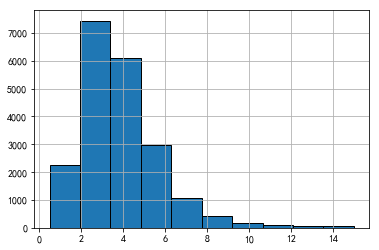

In [42]:
housing["median_income"].hist(edgecolor="black")

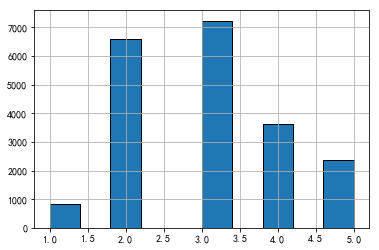

In [43]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist(edgecolor="black")

In [44]:
# 根据收入进行分层抽样
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    print(len(strat_train_set),len(strat_test_set))

16512 4128


In [45]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [46]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [47]:
# 比较分层抽样和随机抽样，测试集的样本比例分布和完整数据集的差异
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [48]:
# 删除 income_cat 属性
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

虽然在测试集的生成上花费了大量时间，但这都是很有必要的，并且到讨论交叉验证的时候，查立谈到的许多想法，也对其大有裨益
<br>总结：
1. 切分数据集，最简单的是随机切
1. 又为了避免出现抽样偏差，我们可以考虑分层抽样
1. 又为了避免在测试时，样本每次发生变化，难以度量，故而会固定随机数，又或者根据一个稳定的特征，采用HASH计算的方式，来切分

# 从数据探索和可视化中获得洞见

接下来我们把测试集扔一边，能探索的之后训练集。此外如果训练集特别庞大，我们可以抽样一个探索集，这样后面的操作都会更简单快捷一些。
<br> 首先创建一个副本，这样可以随便尝试，而不用担心损害训练集

In [49]:
housing=strat_train_set.copy()

## 将地理数据可视化

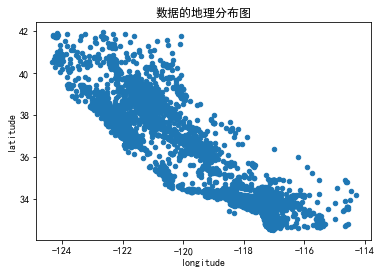

In [50]:
# 不太容易看出其他模式
housing.plot(kind="scatter",x="longitude",y="latitude",
            title="数据的地理分布图")

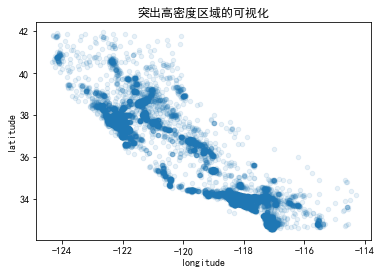

In [51]:
# 更容易看出高密度点的位置
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,
             title="突出高密度区域的可视化")

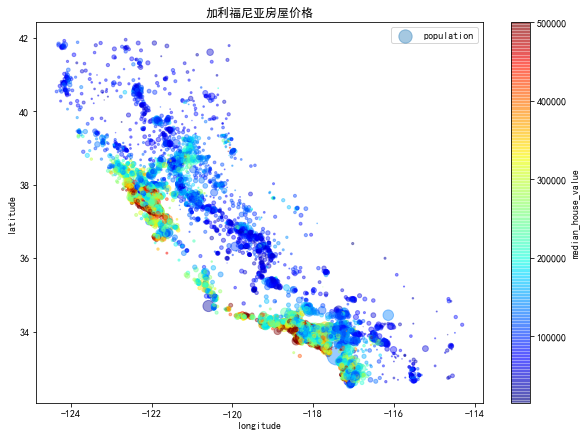

In [52]:
# 更容易看出高密度点的位置
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing["population"]/100,label="population",figsize=(10,7),
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
             sharex=False,
             title="加利福尼亚房屋价格")
plt.legend()

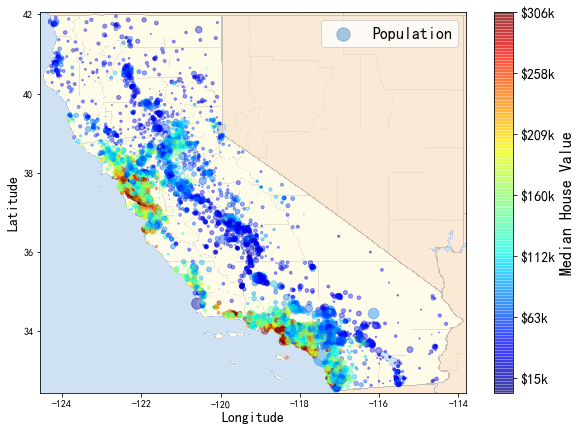

In [53]:
# 带上地图
import matplotlib.image as mpimg
california_img=mpimg.imread('./images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

通过图片，可以很容易发现房屋价格核地理位置(例如靠海)和人口密度息息相关。
<br>一个通常很有用的方法是，使用聚类算法来检测主群体，然后为各个聚类中心添加一个新的衡量邻近距离的特征。

## 寻找相关性

使用 corr() 在不大数据集上计算没对属性间的标准相关系数（也称为皮尔逊相关系数）

In [54]:
corr_matrix=housing.corr()

In [55]:
# 越接近1和-1 越相关，0代表没有线性关系
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A6D395A20>,
      dtype=object)

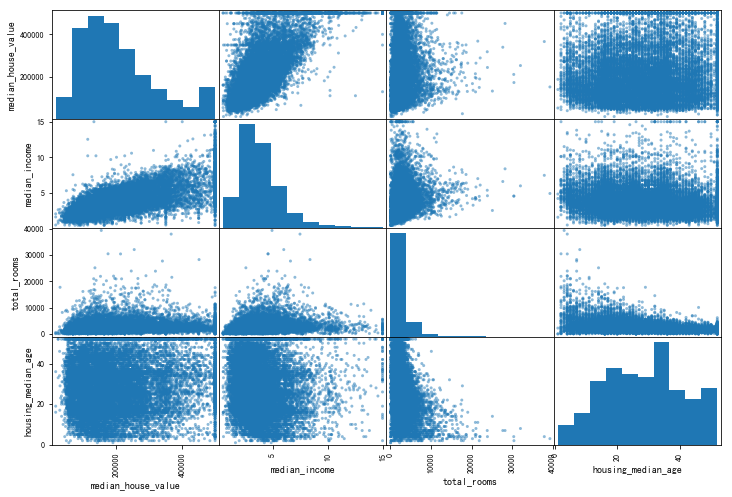

In [56]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))

[0, 16, 0, 550000]

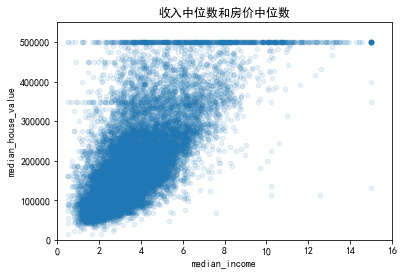

In [57]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1,title="收入中位数和房价中位数")
plt.axis([0, 16, 0, 550000])

这张图说明几个问题：
1. 首先，二者相关性很强
1. 其次 50 45 35 28 万美元附近都有一条线
<br>为了避免以后的学习算法重新这些怪异的数据，可以考虑尝试删除相应地区

## 实验不同属性的组合

在准备给机器学习的算法输入数据之前，我们可能已经识别出了一些异常数据，需要提前清理掉
<br>同时，也发现不同属性间的某些有趣的联系，特别是跟目标属性相关的联系
<br>再有，某些数据的分布有明显的"重尾"分布，因此还需要对这些数据做转换处理(比如计算其对数)

以本项目为例，如果不知道一个地区有多少个家庭，那么知道一个地区的“总房屋数”也没什么。我们真正想知道的是一个家庭的房屋数量。
<br>同样，但看“卧室总数”这个属性本身，也没有什么意义，我们可能是想拿它和“房屋总数”来对比，或者拿来同“每个家庭的人口数”这个属性结合也似乎挺有意思。
<br>我们来试试创建这些新的数据

In [58]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [59]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

显然，新的bedrooms_per_room较“房屋总数”还是“卧室总数”与房价中位数的相关性都要高得多。显然卧室/房屋比例更低的房屋，往往价格越贵。
<br>同样“每一个家庭的房间数量”也比“房间总数”更具信息量--房屋越大，价格越贵

# 机器学习算法的数据准备

接下来，需要给机器学习算法准备数据，这里应该编写函数来执行，而不是手动操作，原因如下：
1. 可以在任何数据集上轻松重现这些转换(例如，更新数据库之后)
1. 逐渐建立起一个轻松转换函数的函数库，在以后的项目中可以重用
1. 可以在实时系统中使用这些函数来转换新数据，在喂给算法
1. 可以轻松尝试多种转换方式，查看哪种转换的组合效果最佳

In [60]:
# 回到干净的数据集，并且将预测器和标签分开，因为可能使用不同的转换方式
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## 数据清理

大部分机器学习算法无法在缺失的特征上工作,所以我们要创建一些函数来辅助它。
前面我们已经注意到total_bedrooms属性有部分值缺失，所以需要解决。
有以下三种选择
1. 放弃这些相应的地区
1. 放弃这个属性
1. 将缺失值设置为某个值

In [61]:
# 缺失属性的数据
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [64]:
# 方法一
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [66]:
# 方法二
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [62]:
# 方法三，用中位数填充
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [63]:
# 使用sklearn函数来实现
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# 移除文本值
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [64]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [66]:
# 替换
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


## 处理文本和分类属性

之前我们排除了ocean_proximity,因为这是一个文本属性，无法计算中位数值。大部分机器学习算法都更容易和数字打交道，所以我们先将这些文本转化为数字。
<br> sklearn为这类任务提供了一个转换器OrdinalEncoder:

In [67]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [68]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [69]:
print(ordinal_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


这样的问题是，计算机会以为相近的两个数字比离得较远的数字更相似一些，然而事实并非如此，0和4的相似度就可能比0和1更高，为了解决这个问题，我们使用one-hot编码，给每一个类别创建一个二进制属性。

In [70]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [71]:
# 默认返回的时候稀疏矩阵，仅存储非0值元素位置，节省内存，转换为Numpy数组来显示
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [72]:
# 指定 sparse=False 来返回二维矩阵，而不是稀疏矩阵
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [73]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 自定义转换器

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [75]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [76]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


## 特征缩放

特征缩放时最重要也最需要应用到数据上的转换器，就是特征缩放，如果输入的数值属性具有非常大的比例差异，往往导致机器学习算法的表现性能不佳，当然也有极少数特例。案例中的房屋数量就是如此，从6到39320，二收入中位数的范围是0到15。
<br>同比例缩放所有属性，常用的两种方法是:最小-最大缩放和标准化
* 最小-最大缩放很简单，就是如下，sklearn提供了MinMaxScaler的转换器，如果不想缩放到0-1，也可以通过超参数来控制
$$x=\frac{x-min}{max-min}$$
* 标准化则不一样，首先减去均值，然后除以方差，从而使结果具有单位方差。标准化的方法受异常值的影响更小，不过不将值绑定到0-1。Sklearn提供了StandadScaler来处理

## 转换流水线

Sklearn提供了Pipeline来使准换器按照正确的顺序来执行，除最后一个是估算器之外，前面必须是转换器，要有fit_transform方法

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [78]:
from sklearn.compose import ColumnTransformer

In [79]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [80]:
housing_prepared.shape

(16512, 16)

# 选择和训练模型

至此，我们框出了问题，获得了数据，也进行了数据探索，然后对数据集和测试集进行了抽样，并编写了转换流水器，从而可以自动清理和准备机器学习算法的数据了。接下来，需要选择机器学习模型并展开训练

## 培训和评估训练集

In [82]:
# 训练一个线性回归模型
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions",lin_reg.predict(some_data_prepared))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [84]:
print("Labels:",list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [86]:
# 使用均方差来度量误差
from sklearn.metrics import mean_squared_error

housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


In [87]:
# 使用平均误差来度量损失
from sklearn.metrics import mean_absolute_error
lin_mae=mean_absolute_error(housing_labels,housing_prediction)
lin_mae

49439.895990018966

这是典型的模型对训练数据拟合不足的例子，接下来，可通过选择更强大的模型，或者未算法提供更好的特征，又或者减少对模型的限制等方法，来修正拟合不足。
<br>我们这个模型不是正则化模型，所以排除最后一个选项，可以试试添加更多特征，但首先，让我们尝试一个更复杂的模型

In [89]:
# 决策树模型，第六章，会有更详细的介绍
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [90]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

我们可以看见，误差为0，这可能吗？是模型完美？还是严重过度拟合了？前面有提到，当我们有信心启动模型之前，都不要触碰测试集，所以这里，我们需要那训练集中的一部分用于训练，另一部分用来做模型验证

## 使用交叉验证来更好地进行评估

使用交叉验证来评估模型

In [91]:
# k折交叉验证
from sklearn.model_selection import cross_val_score
# 返回的是负值
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [92]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


通过交叉验证，可以看见，模型的效果比线性回归模型还要糟糕，这里决策树的评分为71200，上下浮动2400+。如果只使用一个验证集，就收不到这样的结果。交叉验证的代价就是要多次训练模型，因此也不是永远都行的通。
<br>保险起见，接下来，我们也计算一下线性回归模型的评分。

In [93]:
scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983425


我们可以看见，线性回归模型的评分为69052，比决策树要稍微好点。
<br>接下来，我们尝试随机森林模型，第七章会介绍随机森林的工作原理，通过对特征的随机子集进行多个决策树的训练，然后对其预测取平均值。
<br>在多个模型的基础上建立模型，称为集成算法，这是进一步推动机器学习算法的好方法。

In [94]:
# 尝试随机森林算法
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [95]:
# 进行交叉验证
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


我们可以看见效果要比前面两个都要好，但是训练集的评分仍然远低于验证集，这意味着模型仍然对训练集过度拟合

In [96]:
# 尝试支持向量回归模型
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [97]:
# 进行交叉验证
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean: 111809.84009600841
Standard deviation: 2762.393664321567


保存模型，以便于复现结果

In [99]:
import joblib

joblib.dump(lin_reg,"02-lin_reg.pkl")

['02-lin_reg.pkl']

In [100]:
load_model=joblib.load("02-lin_reg.pkl")

In [101]:
# 使用均方差来度量误差
from sklearn.metrics import mean_squared_error

housing_prediction=load_model.predict(housing_prepared)
load_model_mse=mean_squared_error(housing_labels,housing_prediction)
load_model_rmse=np.sqrt(load_model_mse)
print(load_model_rmse==lin_rmse)

True


# 微调模型

我们已经有了一个有效模型的候选列表，现在就是要对这些进行微调，以下有几个可行的办法

# 网格搜索

一种微调的办法是手动调整超参数，找到一组很好的超参数值组合，但是这个过程很枯燥，我们很可能坚持不了足够的时间来探索各种组合
<br>我们可以使用sklearn的GridSearchCV来进行探索，只需要告诉它需要进行实验的超参数是什么，以及需要尝试的值，它会使用交叉验证来评估超参数的所有可能的组合。
<br>例如，下面是探索随机森林的超参数值的最佳组合

In [102]:
from sklearn.model_selection import GridSearchCV
#(12+6)*5 = 90!
param_grid=[
    {"n_estimators":[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],"n_estimators":[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error",
            return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

如果 refit=True 那么在找到最佳估算器之后，会用整个训练集，重新训练

In [103]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [104]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [105]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [106]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053807,0.001264,0.003188,0.000400,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053749e+09,1.519609e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.175069,0.005862,0.007352,0.000470,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094381e+09,1.327046e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.533743,0.009832,0.020345,0.000507,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626879e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.085533,0.001507,0.002618,0.000462,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716852e+09,1.631421e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.283838,0.003168,0.007792,0.000380,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781611e+09,1.268562e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.847915,0.006742,0.021326,0.001349,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537877e+09,1.214603e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.113283,0.003027,0.002620,0.000433,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441447e+09,1.893141e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.387993,0.009813,0.007381,0.000469,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704640e+09,1.471542e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.162287,0.017136,0.020946,0.000041,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514668e+09,1.285063e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.145995,0.005464,0.002676,0.000384,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348851e+09,1.241864e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


现在，通过网格搜索，我们已近找到了较为适合随机森林的超参数 8 30，评分为49682.25345942335 ，比之前都要好。
<br>此外，网格搜索也可以用来自动寻找是否添加某些不确定的特征，同样这也是用来自动寻找处理问题的最佳方法，例如处理异常值，确实特征，以及特征选择。

## 随机搜索

探索组合非常少的时候，我们可以使用网格搜索，但是，如果超参数的搜索范围较大时，通常会选择RandomizedSearchCV，它不会尝试所有组合，而是在每个迭代中，为每个超算数随机选择一个值，然后对一定数量的随机组合进行评估。
<br>这个方法有两个显著特征:
<br>如果运行随机搜索1000个迭代，那么将会探索每个超参数的1000个不同的值(而不是网格搜索那样，每个超参数仅搜索少量几个值)
<br>通过简单的设置迭代次数，可以更好地控制分配给探索的超参数的计算预算。

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [108]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


## 集成方法

还有一种微调系统的方法是将表现最优的模型组合起来。组合（或“集成”）方法通常比最佳的单一模型更好（像随机森林比其所依赖的任何单个决策树模型更好一样）,特别是当单一模型产生严重不同类型的错误时，更是如此，我们会在第七章介绍这个主题

## 分析最佳模型及其错误

通过检查最佳模型，我们总是可以获得一些更好的洞见。比如在进行准确预估时，RandomForestRegressor可以指出每个属性的相对重要程度

In [109]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [111]:
# 表示名字
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

据此，我们可以删除一些不太有用的特征，比如本例中，ocean_proximity只有一个有用，可以尝试删除其他所有特征。
<br>然后，还应该查看一下系统产生的具体错误，尝试了解其产生的原因，已经该如何解决(通过添加额外特征，或是删除没有信息的特征，清楚异常值，等等)

## 通过测试集评估系统

通过一段时间的训练，我们已经有了一个表现足够有些的系统，接下来，该用测试集评估最终模型了。这个过程没有什么特别的：只需要从测试集中获取预测期和标签，运行full_pipeline来转换数据(调用transform()而不是fit_transform())，然后在测试集上评估最终模型：

In [112]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

一般而言，这个结果会略逊于之前使用交叉验证的表现结果(因为用过不断调整，系统虽然在验证数据上终于表现良好，在未知数据上可能达不到那么好的效果)。在本例中，虽然并非如此，但是如果效果不好，不要忍不住去调超参数，不要试图再努力让测试集的结果也变得好看一些，因为这些改进会在泛化到新的数据集时，又变成徒劳。
<br>现在进入项目预启动阶段：
* 展示解决方案(强调学习了什么，什么有用，什么没有用，基于什么假设，以及系统的限制有哪些)
* 记录所有事情
* 通过清晰的可视化和易于记忆的陈述方式，制作漂亮的演示文稿(例如：收入中位数是预测房价的首要指标)

# 启动、监控和维护系统

1. 为生产环境做好准备，特别是将生产数据源接入系统，并编写测试。
1. 编写监控代码，定期检查系统实时性能，在性能下降的时候触发警报
1. 评估系统性能，对系统的预测结果进行抽样评估，这一步一般需要人工分析
1. 需要评估输入系统的数据的质量
1. 使用新鲜数据定期训练模型，这个过程要尽可能自动化

# 试试看

通过本章内容，希望能让读者了解一个机器学习项目大概是什么样子，同时本章也提供了一些用来训练系统的工具，如你所见，大部分工作主要在数据准备，构建监控工具，建立人工评估的流水线以及自动定期训练模型上、
<br>机器学习算法固然重要，但是最好还是对整个流程都熟悉一遍，掌握3-4个合适的算法，不要将所有的时间都用来探索高级的算法，而对整个流程视而不见。
<br>kaggle是一个不错的起点

# 练习

## 1.使用不同的超参数，如kernel='linear'或'rbf'，尝试一个支持向量机回归器，不要担心现在不知道超参数的含义。

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=8)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   57.9s
c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:  8.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=8,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [115]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.90313964167

In [116]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

# 2. 尝试用 `RandomizedSearchCV` 代替 `GridSearchCV`

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=8, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   54.8s
c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  7.5min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed: 12.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013A041EAC50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013A041EAAC8>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [118]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54767.99053704408

In [119]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

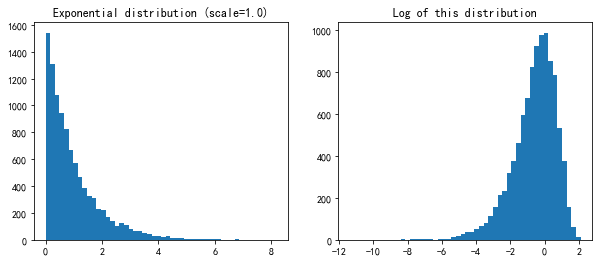

In [120]:
# 指数随机连续分布
expon_distrib = expon(scale=1.)
#产生服从这种分布的一个样本，对随机变量进行随机取值，可以通过size参数指定输出的数组大小。
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

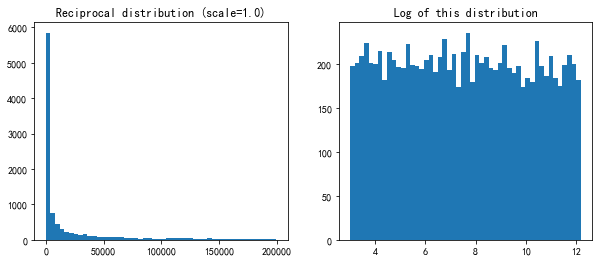

In [121]:
# 倒数连续随机分布
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

# 3.尝试在准备流水线中添加一个转换器，从而只选出最重要的属性

In [122]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [123]:
k = 5

In [124]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [125]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [126]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude')]

In [127]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [128]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [129]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [130]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

# 4.尝试创建一个覆盖完整数据准备的最终预测的流水线

In [131]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [132]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [133]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [203214.28978849 371846.88152572 173295.65441612  47328.3970888 ]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


# 5.使用GridSearchCV自动探索一些准备项目

In [134]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=8)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   42.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                     

In [135]:
grid_search_prep.best_params_

{'feature_selection__k': 15,
 'preparation__num__imputer__strategy': 'most_frequent'}